In [2]:
import numpy as np
import itertools as it
import random
import time
import matplotlib.pyplot as plt

# Algorithms

class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def get_weights(self):
    return self.weights

  def solve_knapsack_brute_force(self):
    permutations = list(it.product(range(2), repeat=len(self.weights)))
    max_profit = 0
    outcome = None
    for i in range(len(permutations)):
      current_weight = 0
      current_profit = 0
      for j in range(len(self.weights)):
        if permutations[i][j]:
          current_weight += self.weights[j]
          current_profit += self.profits[j]
      if current_profit >= max_profit and current_weight <= self.capacity:
        outcome = permutations[i]
        max_profit = current_profit
    return (outcome, max_profit, current_weight)

  def solve_knapsack_pw_ratio(self):
    profit_ratios = []
    for i in range(len(self.weights)):
      profit_ratios.append(((self.profits[i] / self.weights[i]), i))
    profit_ratios.sort()
    profit_ratios.reverse()
    current_weight = 0
    current_profit = 0
    outcome = [0 for i in range(len(self.weights))]
    for i in range(len(profit_ratios)):
      if (current_weight + self.weights[profit_ratios[i][1]]) > self.capacity:
        break
      else:
        current_weight += self.weights[profit_ratios[i][1]]
        current_profit += self.profits[profit_ratios[i][1]]
        outcome[profit_ratios[i][1]] = 1
    return (outcome, current_profit, current_weight)


In [3]:
# Plotter

def brute_force_plot(iters, profits, weights, capacity):
    times_brute = []
    elem_nums = []
    for i in range(iters):
        weights = np.append(weights, np.array([random.randint(1, 20)]))
        profits = np.append(profits, np.array([random.randint(1, 20)]))
        knap = KnapSack(profits, weights, capacity)
        start_time = time.time()
        knap.solve_knapsack_brute_force()
        times_brute.append(time.time() - start_time)
        elem_nums.append(len(knap.get_weights()))
    plt.plot(elem_nums, times_brute)
    plt.xlabel('iterations')
    plt.ylabel('time [s]')
    plt.show()

def comparison_plot(iters, profits, weights, capacity):
    times_brute = []
    times_heur = []
    elem_nums = []
    for i in range(iters):
        weights = np.append(weights, np.array([random.randint(1, 20)]))
        profits = np.append(profits, np.array([random.randint(1, 20)]))
        knap = KnapSack(profits, weights, capacity)
        start_time = time.time()
        knap.solve_knapsack_brute_force()
        times_brute.append(time.time() - start_time)
        start_time = time.time()
        knap.solve_knapsack_pw_ratio()
        times_heur.append(time.time() - start_time)
        elem_nums.append(len(knap.get_weights()))
    plt.plot(elem_nums, times_brute)
    plt.plot(elem_nums, times_heur)
    plt.xlabel('iterations')
    plt.ylabel('time [s]')
    plt.show()

((0, 1, 1, 0), 17, 18)
([0, 1, 0, 1], 14, 5)


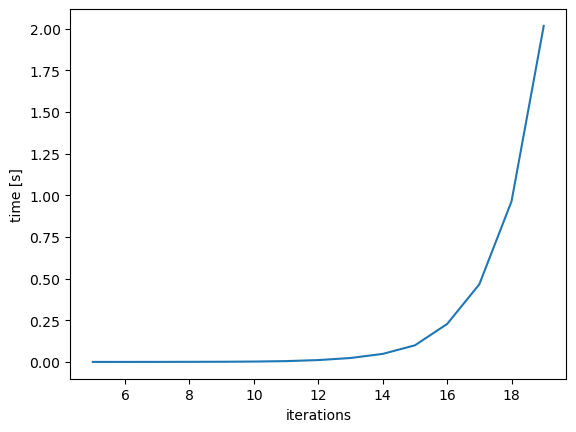

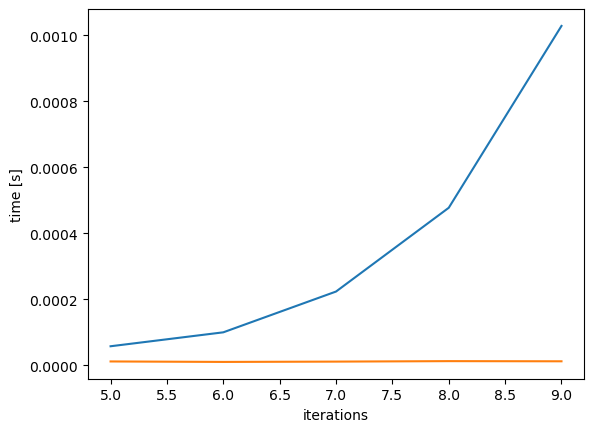

In [4]:
# Plot

weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

knap = KnapSack(profits, weights, capacity)
print(knap.solve_knapsack_brute_force())
print(knap.solve_knapsack_pw_ratio())

capacity_plot = 45
brute_force_plot(15, profits, weights, capacity_plot)
comparison_plot(5, profits, weights, capacity_plot)

Metody te nie mają takich samych rozwiązań (jedynie w szczególych przypadkach), co jest spodziewanym rezeultatem ze względu na przyjętą heurystykę. Mimo faktu, że pozwala ona jedynie na szacowanie wyniku od dołu, daje ona bliskie optymalnym rezultaty ale przede wszystkim zapewnia ona liniową zależność czasu od wielkości danych, przy zależności wykładniczej dla metody brute force. Jest to fundamentalna przewaga różnego rodzaju heurystyk nad metodami przeglądu wszystkich kombinacji.

Those methods do not provide same results (only in particular cases). Such an outcome was expected due to a chosen heuristic. Even though this method allows to do only a bottom-up estimation, it gives results that are close to an optimum outcome. Most importantly it provides linear computational complexity in comparison to exponential one when it comes to a brute force method. It is a fundamental advantage of certain heuristics over whole overview methods.